In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

link = 'https://gist.github.com/robblack007/eca03fa9f7586860235d/raw/ef05a2f29febc94a9c9f99ca20fd0b65e74ed451/custom.css'
display_html(urlopen(link).read(), raw=True)

# Dinámica de un robot manipulador planar

In [2]:
from sympy import var, sin, cos, Matrix, Integer, eye, Function, Rational, exp, Symbol, I, solve, pi, trigsimp, dsolve, sinh, cosh, simplify
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

In [3]:
var("m1 m2 J1 J2 L1 L2 l1 l2 t g")

In [4]:
q1 = Function("q1")(t)
q2 = Function("q2")(t)

In [5]:
x1 = l1*cos(q1)
y1 = l1*sin(q1)
v1 = x1.diff("t")**2 + y1.diff("t")**2
v1.trigsimp()

In [6]:
x2 = L1*cos(q1) + l2*cos(q1 + q2)
y2 = L1*sin(q1) + l2*sin(q1 + q2)
v2 = x2.diff("t")**2 + y2.diff("t")**2
v2.trigsimp()

In [7]:
ω1 = q1.diff("t")
ω2 = q2.diff("t")

In [8]:
K1 = Rational(1, 2)*m1*v1 + Rational(1, 2)*J1*ω1**2
K1

In [9]:
K2 = Rational(1, 2)*m1*v2 + Rational(1, 2)*J2*ω2**2
K2

In [10]:
U1 = m1*g*y1
U1

In [11]:
U2 = m2*g*y2
U2

In [12]:
K = K1 + K2
K

In [13]:
U = U1 + U2
U

In [14]:
L = (K - U).expand().simplify()
L

In [15]:
(L.diff(q1.diff(t))).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [16]:
(L.diff(q1.diff(t)).diff(t)).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [17]:
(L.diff(q1)).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [18]:
(L.diff(q2.diff(t))).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [19]:
(L.diff(q2.diff(t)).diff(t)).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [20]:
(L.diff(q2)).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [21]:
τ1 = (L.diff(q1.diff(t)).diff(t) - L.diff(q1)).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [22]:
τ2 = (L.diff(q2.diff(t)).diff(t) - L.diff(q2)).simplify().expand().collect(q1.diff(t).diff(t)).collect(q2.diff(t).diff(t))

In [23]:
τ1

In [24]:
τ2

In [25]:
from scipy.integrate import odeint
from numpy import linspace

In [26]:
def pendulo_doble(estado, tiempo):
    # Se importan funciones necesarias
    from numpy import sin, cos, matrix
    # Se desenvuelven variables del estado y tiempo
    q1, q2, q̇1, q̇2 = estado
    t = tiempo
    
    # Se declaran constantes del sistema
    m1, m2 = 1, 1
    l1, l2 = 0.5, 0.5
    L1, L2 = 1, 1
    g = 9.81
    
    # Se declaran constantes del control
    kp1, kp2 = -30, -60
    kv1, kv2 = -20, -20
    
    # Señales de control nulas
    tau1, tau2 = 0, 0
    
    # Posiciones a alcanzar
    qd1, qd2 = 1, 1
    
    # Se declaran señales de control del sistema
    #tau1 = kp1*(q1 - qd1) + kv1*q̇1
    #tau2 = kp2*(q2 - qd2) + kv2*q̇2
    
    # Se calculan algunos terminos comunes
    ϕ1 = m1*l1**2
    ϕ2 = m1*l1*l2
    ϕ3 = m1*l2**2
    
    # Se calculan las matrices de masas, Coriolis,
    # y vectores de gravedad, control, posicion y velocidad
    M = matrix([[2*ϕ1 + 2*ϕ2*cos(q2) + ϕ3, ϕ2*cos(q2) + ϕ3],
                [ϕ2*cos(q2) + ϕ3, ϕ3]])
    C = matrix([[-2*ϕ2*sin(q2)*q̇2, -ϕ2*sin(q2)*q̇2], [ϕ2*sin(q2)*q̇1, 0]])
    G = matrix([[m1*l1*cos(q1) + m2*l1*cos(q1) + m2*l2*cos(q1 + q2)], [m2*l2*cos(q1 + q2)]])
    Tau = matrix([[tau1], [tau2]])
    q = matrix([[q1], [q2]])
    q̇ = matrix([[q̇1], [q̇2]])
    
    # Se calcula la derivada del estado del sistema
    qp1 = q̇1
    qp2 = q̇2
    
    qpp = M.I*(Tau - C*q̇ - G)
    qpp1, qpp2 = qpp.tolist()
    
    return [qp1, qp2, qpp1[0], qpp2[0]]

In [27]:
t = linspace(0, 10, 1000)
estados_simulados = odeint(func = pendulo_doble, y0  = [0, 0, 0, 0], t = t)

In [28]:
q1, q2, q̇1, q̇2 = list(zip(*estados_simulados.tolist()))

In [29]:
%matplotlib notebook
from matplotlib.pyplot import plot, style, figure
from mpl_toolkits.mplot3d import Axes3D
style.use("ggplot")

<IPython.core.display.Javascript object>


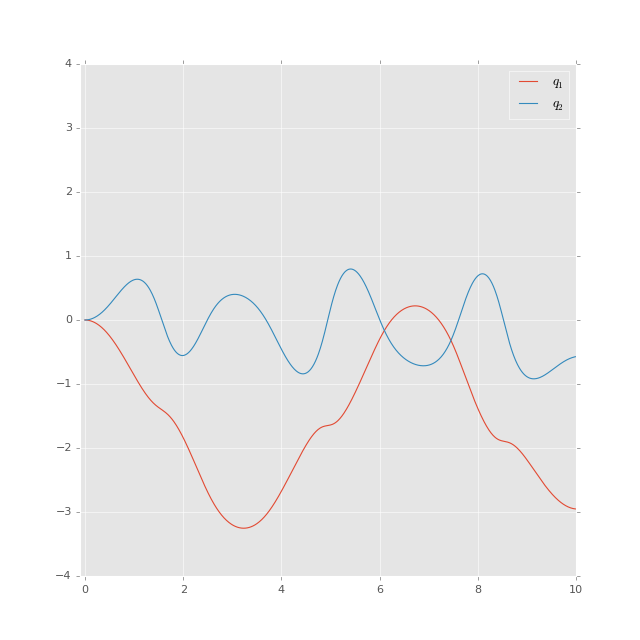

In [30]:
fig1 = figure(figsize=(8, 8))

ax1 = fig1.gca()

p1, = ax1.plot(t, q1)
p2, = ax1.plot(t, q2)
ax1.legend([p1, p2],[r"$q_1$", r"$q_2$"])
ax1.set_ylim(-4, 4)
ax1.set_xlim(-0.1, 10);